In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head()

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


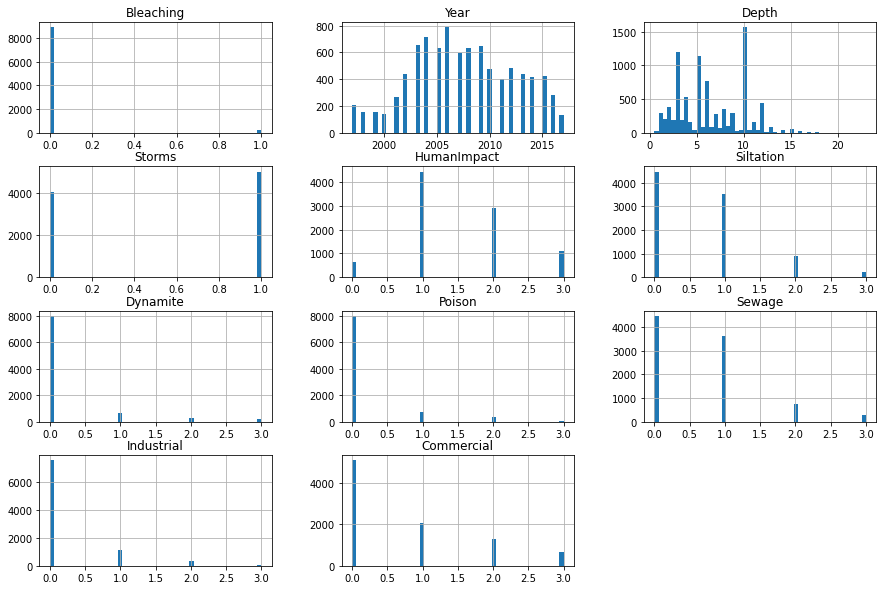

In [53]:
# Histogram of the dataset
df.hist(bins=50, figsize=(15,10))
plt.show()

In [54]:
# Correlations of the dataset
df.corr()

,Bleaching,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
Bleaching,1.000000,-0.240223,0.009700,0.009698,0.005644,-0.141501,0.038111,0.024965,0.000872,0.009740,-0.126843
Year,-0.240223,1.000000,-0.033320,-0.017736,0.020537,0.204994,-0.005609,-0.037029,0.053167,0.039224,0.209361
Depth,0.009700,-0.033320,1.000000,-0.015096,-0.050125,-0.066802,0.013688,-0.002401,0.016850,0.039402,0.102916
Storms,0.009698,-0.017736,-0.015096,1.000000,0.058480,-0.000932,-0.045574,-0.043580,-0.030109,-0.024760,0.006605
HumanImpact,0.005644,0.020537,-0.050125,0.058480,1.000000,0.253754,0.247977,0.243045,0.372817,0.211980,0.209635
Siltation,-0.141501,0.204994,-0.066802,-0.000932,0.253754,1.000000,0.012735,0.040179,0.201693,0.197093,0.266505
Dynamite,0.038111,-0.005609,0.013688,-0.045574,0.247977,0.012735,1.000000,0.739551,0.078760,0.128826,0.176601
Poison,0.024965,-0.037029,-0.002401,-0.043580,0.243045,0.040179,0.739551,1.000000,0.132345,0.141309,0.176474
Sewage,0.000872,0.053167,0.016850,-0.030109,0.372817,0.201693,0.078760,0.132345,1.000000,0.311043,0.246182
Industrial,0.009740,0.039224,0.039402,-0.024760,0.211980,0.197093,0.128826,0.141309,0.311043,1.000000,0.176768


# Visualizing Bleaching

In [9]:
# Checking the number of bleached and not bleached corals in the dataset
bleached = df[df['Bleaching']==1]['Bleaching'].count()
notbleached = df[df['Bleaching']==0]['Bleaching'].count()
print("Number of bleached: ", bleached)
print("Number of not bleached: ", notbleached)

Number of bleached:  255
Number of not bleached:  8856


In [11]:
# Checking to see if the totals add up
df.info()

print("Total: ", bleached + notbleached)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9111 entries, 0 to 9110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bleaching    9111 non-null   int64  
 1   Ocean        9111 non-null   object 
 2   Year         9111 non-null   int64  
 3   Depth        9111 non-null   float64
 4   Storms       9111 non-null   int64  
 5   HumanImpact  9111 non-null   int64  
 6   Siltation    9111 non-null   int64  
 7   Dynamite     9111 non-null   int64  
 8   Poison       9111 non-null   int64  
 9   Sewage       9111 non-null   int64  
 10  Industrial   9111 non-null   int64  
 11  Commercial   9111 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 854.3+ KB
Total:  9111


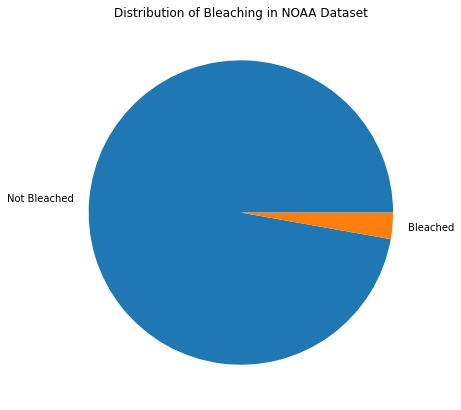

In [16]:
# Creating a pie chart to visualize
names = ["Not Bleached", "Bleached"]
data = [notbleached, bleached]

# Creating the plot
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(data, labels = names)
ax.set_title("Distribution of Bleaching in NOAA Dataset")
plt.show()

# Visualizing Human Impact

In [37]:
# Counting the numbers of none, low, moderate, and high entries
HInone = df[df['HumanImpact']==0]['HumanImpact'].count()
HIlow = df[df['HumanImpact']==1]['HumanImpact'].count()
HImoderate = df[df['HumanImpact']==2]['HumanImpact'].count()
HIhigh = df[df['HumanImpact']==3]['HumanImpact'].count()

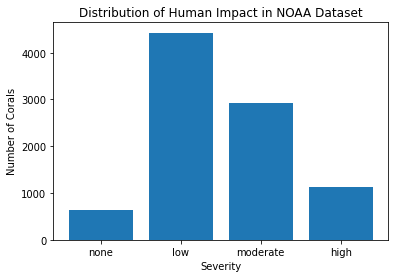

In [38]:
desc = ['none', 'low', 'moderate', 'high']
data = [HInone, HIlow, HImoderate, HIhigh]

plt.bar(desc, data)
plt.title('Distribution of Human Impact in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Siltation

In [39]:
# Counting the numbers of never, occasionally, often, and always entries
SILTnever = df[df['Siltation']==0]['Siltation'].count()
SILToccasionally = df[df['Siltation']==1]['Siltation'].count()
SILToften = df[df['Siltation']==2]['Siltation'].count()
SILTalways = df[df['Siltation']==3]['Siltation'].count()

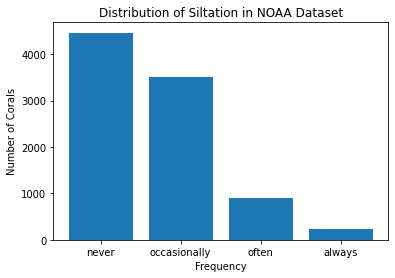

In [40]:
desc = ['never', 'occasionally', 'often', 'always']
data = [SILTnever, SILToccasionally, SILToften, SILTalways]

plt.bar(desc, data)
plt.title('Distribution of Siltation in NOAA Dataset')
plt.xlabel('Frequency')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Dynamite


In [41]:
# Counting the numbers of none, low, moderate, and high entries
DYnone = df[df['Dynamite']==0]['Dynamite'].count()
DYlow = df[df['Dynamite']==1]['Dynamite'].count()
DYmoderate = df[df['Dynamite']==2]['Dynamite'].count()
DYhigh = df[df['Dynamite']==3]['Dynamite'].count()

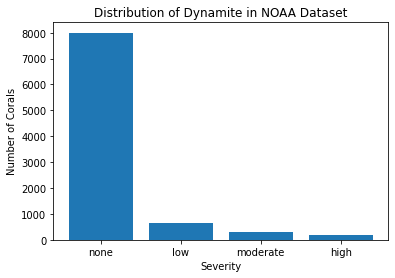

In [42]:
desc = ['none', 'low', 'moderate', 'high']
data = [DYnone, DYlow, DYmoderate, DYhigh]

plt.bar(desc, data)
plt.title('Distribution of Dynamite in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Poison

In [43]:
# Counting the numbers of none, low, moderate, and high entries
POInone = df[df['Poison']==0]['Poison'].count()
POIlow = df[df['Poison']==1]['Poison'].count()
POImoderate = df[df['Poison']==2]['Poison'].count()
POIhigh = df[df['Poison']==3]['Poison'].count()

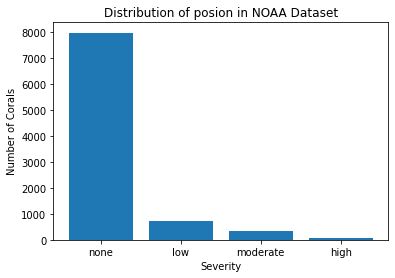

In [44]:
desc = ['none', 'low', 'moderate', 'high']
data = [POInone, POIlow, POImoderate, POIhigh]

plt.bar(desc, data)
plt.title('Distribution of Poison in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Sewage

In [45]:
# Counting the numbers of none, low, moderate, and high entries
SEWnone = df[df['Sewage']==0]['Sewage'].count()
SEWlow = df[df['Sewage']==1]['Sewage'].count()
SEWmoderate = df[df['Sewage']==2]['Sewage'].count()
SEWhigh = df[df['Sewage']==3]['Sewage'].count()

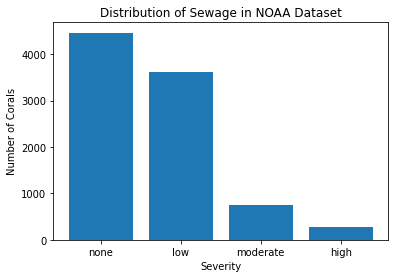

In [46]:
desc = ['none', 'low', 'moderate', 'high']
data = [SEWnone, SEWlow, SEWmoderate, SEWhigh]

plt.bar(desc, data)
plt.title('Distribution of Sewage in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Industrial

In [48]:
# Counting the numbers of none, low, moderate, and high entries
INDnone = df[df['Industrial']==0]['Industrial'].count()
INDlow = df[df['Industrial']==1]['Industrial'].count()
INDmoderate = df[df['Industrial']==2]['Industrial'].count()
INDhigh = df[df['Industrial']==3]['Industrial'].count()

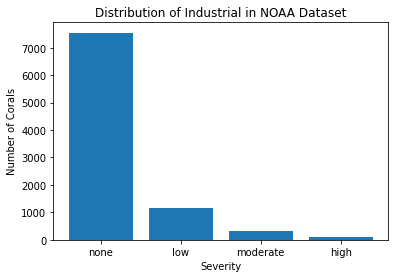

In [49]:
desc = ['none', 'low', 'moderate', 'high']
data = [INDnone, INDlow, INDmoderate, INDhigh]

plt.bar(desc, data)
plt.title('Distribution of Industrial in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()

# Visualizing Commercial

In [50]:
# Counting the numbers of none, low, moderate, and high entries
COMnone = df[df['Commercial']==0]['Commercial'].count()
COMlow = df[df['Commercial']==1]['Commercial'].count()
COMmoderate = df[df['Commercial']==2]['Commercial'].count()
COMhigh = df[df['Commercial']==3]['Commercial'].count()

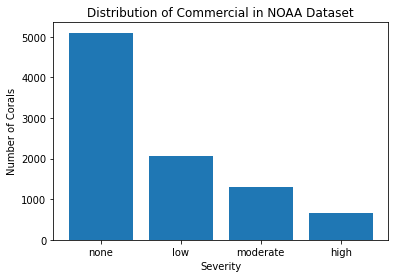

In [51]:
desc = ['none', 'low', 'moderate', 'high']
data = [COMnone, COMlow, COMmoderate, COMhigh]

plt.bar(desc, data)
plt.title('Distribution of Commercial in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()